In [3]:
import sqlalchemy
from sqlalchemy import create_engine, text, func
from sqlalchemy import Column, Integer, String, Float
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import Session
from sqlalchemy.ext.automap import automap_base
from sqlalchemy import inspect
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json


In [4]:
df = pd.read_csv("Final_Cleaned_Data.csv")
df

,Participant ID,Age (Years),Gender,Exercise Type (1-10),Exercise Intensity,Exercise Duration (Minute),Calories Burnt (Cal),Calories Burnt (60 min),Heart Rate (BPM),BMI,Recorded Weight (Kg),Dream Weight (Kg)
0,3,20,0,4,4,20,261.22,783.67,148,27.90,71,70
1,7,18,0,9,10,53,457.63,518.07,103,34.59,61,65
2,8,42,0,4,2,25,272.96,655.10,104,22.05,62,64
3,20,49,0,9,8,59,103.34,105.09,149,20.45,84,88
4,22,29,0,9,2,37,131.46,213.17,135,20.54,52,54
...,...,...,...,...,...,...,...,...,...,...,...,...
760,3850,56,0,9,3,54,113.94,126.60,102,31.93,67,68
761,3853,37,1,9,3,35,132.48,227.11,178,28.65,66,64
762,3861,21,1,4,5,49,486.39,595.58,160,26.60,92,97
763,3862,57,0,4,9,56,264.31,283.19,167,31.44,96,94


In [5]:
df.dtypes


Participant ID                  int64
Age (Years)                     int64
Gender                          int64
Exercise Type (1-10)            int64
Exercise Intensity              int64
Exercise Duration (Minute)      int64
Calories Burnt (Cal)          float64
Calories Burnt (60 min)       float64
Heart Rate (BPM)                int64
BMI                           float64
Recorded Weight (Kg)            int64
Dream Weight (Kg)               int64
dtype: object

In [6]:
median_heart_rate = df.loc[df['Exercise Type (1-10)'].isin([4,9])].groupby(['Gender', 'Exercise Type (1-10)'])[['Heart Rate (BPM)']].median()
median_heart_rate

Heart Rate (BPM)
Gender Exercise Type (1-10)                  
0      4                                139.0
       9                                144.0
1      4                                140.0
       9                                134.0

In [7]:
mean_heart_rate = df.loc[df['Exercise Type (1-10)'].isin([4,9])].groupby(['Gender', 'Exercise Type (1-10)'])[['Heart Rate (BPM)']].mean()
mean_heart_rate

Heart Rate (BPM)
Gender Exercise Type (1-10)                  
0      4                           139.255556
       9                           141.821782
1      4                           140.204188
       9                           135.682292

In [8]:
median_calories_rate = df.loc[df['Exercise Type (1-10)'].isin([4,9])].groupby(['Gender', 'Exercise Type (1-10)'])[['Calories Burnt (Cal)']].median()
median_calories_rate

Calories Burnt (Cal)
Gender Exercise Type (1-10)                      
0      4                                  309.755
       9                                  300.405
1      4                                  316.500
       9                                  326.140

In [9]:
mean_calories_rate = df.loc[df['Exercise Type (1-10)'].isin([4,9])].groupby(['Gender', 'Exercise Type (1-10)'])[['Calories Burnt (Cal)']].mean()
mean_calories_rate

Calories Burnt (Cal)
Gender Exercise Type (1-10)                      
0      4                               318.031167
       9                               300.154406
1      4                               312.193927
       9                               312.092812

In [10]:
df.corr()

,Participant ID,Age (Years),Gender,Exercise Type (1-10),Exercise Intensity,Exercise Duration (Minute),Calories Burnt (Cal),Calories Burnt (60 min),Heart Rate (BPM),BMI,Recorded Weight (Kg),Dream Weight (Kg)
Participant ID,1.000000,0.048238,0.059805,0.004195,0.054407,0.037954,0.073909,0.036681,-0.019494,0.010432,0.094200,0.089644
Age (Years),0.048238,1.000000,0.033247,-0.070440,0.007672,-0.041699,-0.004320,0.009398,-0.001196,-0.015759,0.022550,0.028462
Gender,0.059805,0.033247,1.000000,-0.027503,-0.024241,-0.002006,0.015589,0.010162,-0.058355,0.028153,0.019591,0.011862
Exercise Type (1-10),0.004195,-0.070440,-0.027503,1.000000,-0.042415,-0.051787,-0.039570,0.001445,-0.019928,-0.010733,-0.001621,0.008365
Exercise Intensity,0.054407,0.007672,-0.024241,-0.042415,1.000000,0.053726,0.036140,-0.024133,0.006773,-0.011007,0.040778,0.041901
Exercise Duration (Minute),0.037954,-0.041699,-0.002006,-0.051787,0.053726,1.000000,0.019164,-0.613841,0.016063,-0.007072,-0.020725,-0.022483
Calories Burnt (Cal),0.073909,-0.004320,0.015589,-0.039570,0.036140,0.019164,1.000000,0.715778,-0.041692,0.065548,0.054107,0.066054
Calories Burnt (60 min),0.036681,0.009398,0.010162,0.001445,-0.024133,-0.613841,0.715778,1.000000,-0.039750,0.068612,0.039319,0.051706
Heart Rate (BPM),-0.019494,-0.001196,-0.058355,-0.019928,0.006773,0.016063,-0.041692,-0.039750,1.000000,0.026509,-0.017145,-0.019661
BMI,0.010432,-0.015759,0.028153,-0.010733,-0.011007,-0.007072,0.065548,0.068612,0.026509,1.000000,0.002777,0.008384


<Axes: >

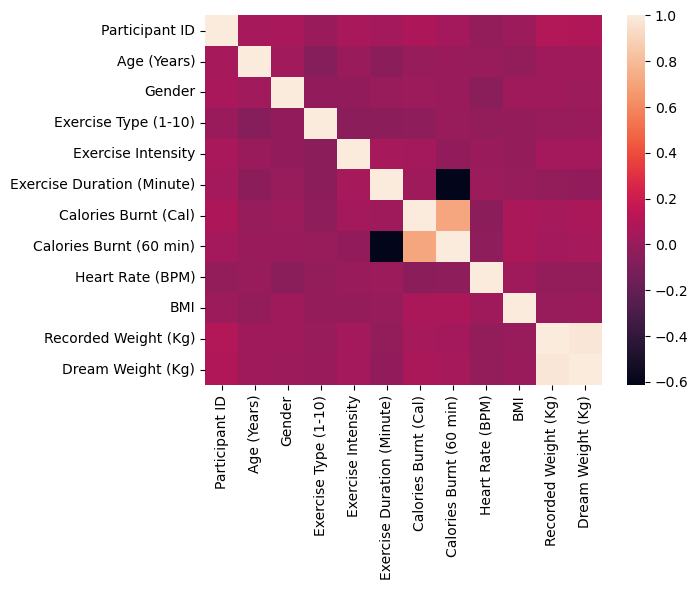

In [14]:
# calculate the correlation matrix on the numeric columns
corr = df.select_dtypes('number').corr()

# plot the heatmap
sns.heatmap(corr)